In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

In [8]:
df = pd.read_excel('neurocontroller_model.xlsx', dtype=np.float32)

In [9]:
df.head(5)

,mass_flow(kg/h),Energy_ref,Torque_ref,screw_speed(rpm),solid_content(%),Energy(kJ/kg),Torque(N.m),∆𝒏,∆𝑐_𝑚
0,2.28,6552.149414,2.972,800.0,70.0,6552.149414,2.972000,0.0,0.0
1,2.28,6552.149414,2.972,1000.0,70.0,9031.174805,3.277172,-200.0,0.0
2,2.28,6552.149414,2.972,1200.0,70.0,8612.666016,2.604422,-400.0,0.0
3,2.28,6552.149414,2.972,800.0,72.5,7118.958984,3.229100,0.0,-2.5
4,2.28,6552.149414,2.972,1000.0,72.5,9297.460938,3.373800,-200.0,-2.5


In [10]:
#define inputs and outputs
df = df.sample(frac=1)
X1_data = df[['mass_flow(kg/h)','Energy_ref','Torque_ref','Energy(kJ/kg)','Torque(N.m)']]
Y1_data = df[['∆𝒏']]   #∆𝒏: Screw_speed                     

X_data = X1_data.values
Y_data= Y1_data.values
# normalize data
scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)
    

# SKLearnModel

In [15]:
model_Dn_Neurocontroller= GradientBoostingRegressor(n_estimators =2000 , learning_rate = 0.2,max_depth=2)
Dn_Neurocontroller = cross_validate(model_Dn_Neurocontroller,X_data,Y_data.reshape(-1,),cv=10,scoring=('neg_mean_absolute_error'),return_train_score=True)

In [16]:
Dn_Neurocontroller

{'fit_time': array([1.31149054, 1.32647586, 1.28259373, 1.51098108, 1.63743234,
        1.27159405, 1.22471714, 1.26259136, 1.23865771, 1.23668933]),
 'score_time': array([0.00402522, 0.00399685, 0.00400019, 0.00496054, 0.00498247,
        0.00398874, 0.0040009 , 0.00498915, 0.00401568, 0.00398898]),
 'test_score': array([-6.78016519, -6.2109274 , -5.52199628, -6.81293401, -4.85269163,
        -6.1905598 , -7.28683834, -8.29221472, -6.80037288, -4.23069375]),
 'train_score': array([-3.26876942, -3.29826025, -3.35386338, -2.86044588, -3.11076221,
        -3.35816396, -3.25903237, -3.48181487, -3.09863917, -2.76068816])}

In [17]:
print("test scores:\n",list(map(abs,Dn_Neurocontroller["test_score"])))
print("mean:  ",abs(np.mean(Dn_Neurocontroller["test_score"])) )
print("\n\n")
print("train scores:\n",list(map(abs,Dn_Neurocontroller["train_score"])))
print("mean:  ",abs(np.mean(Dn_Neurocontroller["train_score"]) ))


test scores:
 [6.78016518781208, 6.210927401610777, 5.521996277657002, 6.812934014446708, 4.852691625568571, 6.190559799417589, 7.286838344774701, 8.292214718367536, 6.80037288308739, 4.230693745665577]
mean:   6.297939399840793



train scores:
 [3.268769417325148, 3.298260245972326, 3.3538633847933257, 2.8604458832562507, 3.1107622089587927, 3.3581639647698944, 3.2590323742237346, 3.4818148655193113, 3.0986391670138507, 2.7606881561662173]
mean:   3.1850439667998853


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.01)
model_Dn_Neurocontroller= GradientBoostingRegressor( learning_rate=0.2, max_depth=3, n_estimators=200)
model_Dn_Neurocontroller.fit(X_train,y_train)
y_pred=model_Dn_Neurocontroller.predict(X_test)

C:\Users\Mahtab\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [41]:
from joblib import dump, load
dump(model_Dn_Neurocontroller,'model_Dn_Neurocontroller.h5') 

['model_Dn_Neurocontroller.h5']

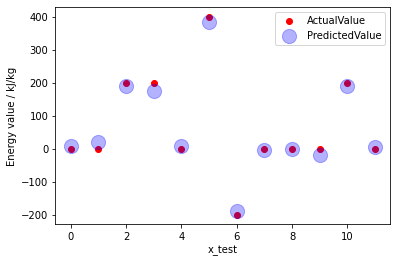

In [39]:
#plots
plt.scatter(list(range(len(y_pred))),y_test, c= ('red'))
plt.scatter(list(range(len(y_pred))),y_pred, c= ('blue'),alpha=0.3,s=200)
plt.xlabel('x_test')
plt.ylabel('Energy value / kJ/kg')
plt.legend(['ActualValue', 'PredictedValue'])
plt.show()